**Import Required Libraries**

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import math

**Read and Transform Data**

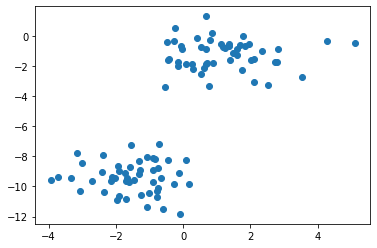

In [3]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=2)
plt.scatter(X[:,0],X[:,1])

In [4]:
#augmenting column of 1's (corresponding to bias term) in data
Aug_data = np.ones((100,3))
Aug_data[:,1:3] = X

---

**User Defined Functions**

In [11]:
#Defining exponential function because math.exp gives overflow error sometimes
def exp(x):
  try:
    answer=math.exp(x)
  except OverflowError:
	  answer = float('inf')
  return answer

In [12]:
#logistic function
def logistic(a):
  if(exp((-1)*a) == float('inf')):
    return 0.00001
  else: return (1 + exp((-1)*a))**(-1)

In [13]:
#cross entropy loss
def l(w):
  sum = 0
  for i in range(100):
    X = np.array(Aug_data[i,:]).reshape(-1,1)
    #print(logistic(((w.T)@ X)[0]))
    sum = sum + y[i]*math.log(logistic(((w.T)@ X)[0])) + (1 - y[i])*math.log(1 - logistic(((w.T)@ X)[0]) + 1e-40)
  return (-1)*sum

In [14]:
#least mean square loss
def lms(w):
  sum = 0
  for i in range(100):
    X = np.array(Aug_data[i,:]).reshape(-1,1)
    sum = sum + (y[i] - logistic(((w.T)@ X)[0]))**2
  return sum

In [15]:
#gradient vector
def gradient(w):
  sum = 0
  for i in range(100):
    X = np.array(Aug_data[i,:]).reshape(-1,1)
    sum = sum + (1-logistic((((w.T)@ X))[0]))*y[i]*X - (1 - y[i])*logistic(((w.T)@ X)[0])*X
  return (-1)*sum

In [16]:
#gradient vector for lms loss 
def gradient_lms(w):
  sum = 0
  for i in range(100):
    X = np.array(Aug_data[i,:]).reshape(-1,1)
    sum = sum + 2*(logistic(((w.T)@ X)[0]) - y[i])*logistic(((w.T)@ X)[0])*(1 - logistic(((w.T)@ X)[0]))*X
  return sum

In [17]:
#descent direction vector for gradient descent in cross entropy
def d_k(w):
  return((-1)*(gradient(w)))

----

**Gradient Descent Algorithm with Constant Step Size and Cross Entropy Loss Function**

In [18]:
#Gradient descent algorithm with constant step size ( cross entropy)
c = np.zeros((3,1))
w_k1 = np.array([6,5,-6]).reshape(-1,1)                                         #initial values
w_k = c 
e = 10**(-2)
iter = 0     
likes = []                                                                                     
while(np.linalg.norm(l(w_k1)) > e):                                             #stopping criteria
   w_k = w_k1
   w_k1 = w_k1 + 5*d_k(w_k)                                                     #constant step size              
   iter = iter + 1 
   likes.append(l(w_k1))                                                        #storing likelihood for plotting 
print("The optimal 'w' is: ")
print(w_k1)
print("The minimal loss is:")
print(l(w_k1))
print("number of iterations required : %d" %iter)

The optimal 'w' is: 
[[1043.67114026]
 [1006.30202839]
 [ 138.2425806 ]]
The minimal loss is:
0.00044627310268291134
number of iterations required : 49


**Plotting Seperating Hyperplane**

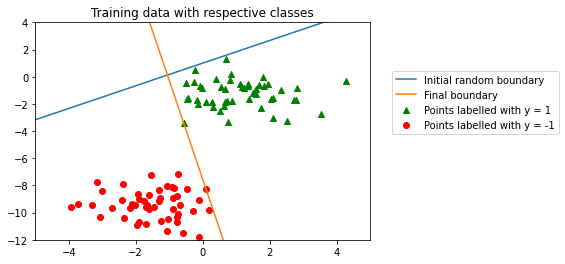

In [13]:
#plot of classification of trained data
def boundary(x,w):
  return (-1)*(w[0] + w[1]*x)/w[2]                                              #defining boundary function
class1 = []
class2 = []                                                                     #classes
for i in range(100):
  if(y[i] == 1): class1.append(Aug_data[i,1:3])
  else: class2.append(Aug_data[i,1:3])
class1 = np.array(class1)
plt.scatter(class1[:,0],class1[:,1], c = 'green', marker = '^',label = 'Points labelled with y = 1')
class2 = np.array(class2)
plt.scatter(class2[:,0],class2[:,1], c = 'red', marker = 'o',label = 'Points labelled with y = -1')
x = np.linspace(-6,5)
plt.plot(x,boundary(x,np.array([6,5,-6]).reshape(-1,1)),label = 'Initial random boundary')
plt.plot(x,boundary(x,w_k1),label = 'Final boundary')
plt.legend(bbox_to_anchor=(1.05,0.8))
plt.xlim(-5,5)
plt.ylim(-12,4)
plt.title("Training data with respective classes")
plt.show()

----

**Gradient Descent Algorithm with Constant Step Size with Least Mean Square (LMS) loss**

In [20]:
#Gradient descent algorithm with constant step size for lms loss 
c = np.zeros((3,1))
w_k1 = np.array([10,10,1]).reshape(-1,1)                                         #initial values
w_k = c 
e = 10**(-4)
iter = 0     
likes = []                                                                                     
while(np.linalg.norm(lms(w_k1)) > e):                                            #stopping criteria
   w_k = w_k1
   w_k1 = w_k1 - gradient_lms(w_k)                                               #constant step size              
   iter = iter + 1 
   #likes.append(l(w_k1))                                                        #storing likelihood for plotting 
print("The optimal 'w' is: ")
print(w_k1)
print("The optimal likelihood is:")
print(lms(w_k1))
print("number of iterations required : %d" %iter)

The optimal 'w' is: 
[[17.21022776]
 [ 5.54866633]
 [ 2.77403986]]
The optimal likelihood is:
9.998754738585733e-05
number of iterations required : 7550


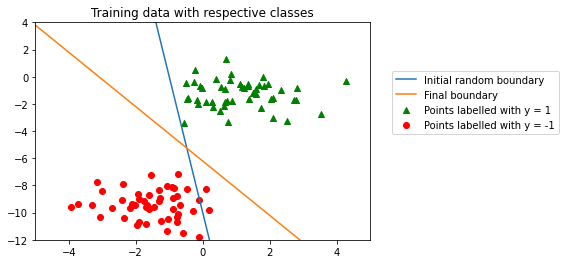

In [21]:
#plot of classification of trained data
def boundary(x,w):
  return (-1)*(w[0] + w[1]*x)/w[2]                                              #defining boundary function
class1 = []
class2 = []                                                                     #classes
for i in range(100):
  if(y[i] == 1): class1.append(Aug_data[i,1:3])
  else: class2.append(Aug_data[i,1:3])
class1 = np.array(class1)
plt.scatter(class1[:,0],class1[:,1], c = 'green', marker = '^',label = 'Points labelled with y = 1')
class2 = np.array(class2)
plt.scatter(class2[:,0],class2[:,1], c = 'red', marker = 'o',label = 'Points labelled with y = -1')
x = np.linspace(-6,5)
plt.plot(x,boundary(x,np.array([10,10,1]).reshape(-1,1)),label = 'Initial random boundary')
plt.plot(x,boundary(x,w_k1),label = 'Final boundary')
plt.legend(bbox_to_anchor=(1.05,0.8))
plt.xlim(-5,5)
plt.ylim(-12,4)
plt.title("Training data with respective classes")
plt.show()

----